# Plot Cosmosis chains with GetDist

In [1]:
import os
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
from des_tools import plotlib
import getdist
from getdist import plots

In [2]:
FTYPE='png'
KDESMOOTH=0.5

# where to find chains
chaindir = os.path.relpath("cosmosis-chains")
# where to put plots
plotdir = chaindir

# dictionary translating cosmosis parameter labels to latex labels
paramlabels = plotlib.DEFAULT_PLABELS

In [4]:
reload(plotlib)
chains = {}

# associating short tags with filenames, chains, labels and filenames for chains.
filedict = {
	'3x2pt': 'des-y3-3x2pt.txt',
	'shear': 'des-y3-shear.txt',
    '2x2pt': 'des-y3-2x2pt.txt',
    'fluid_ede': 'des-y3-ede-fluid-emcee.txt',
    'quint_ede': 'des-y3-ede-quintessence-emcee.txt',
    'lcdm': 'des-y3-lcdm.txt',
    'xipos': 'des-y3-xipos.txt',
    'xineg': 'des-y3-xineg.txt',
}

# What will be in plot legends
labeldict = {
	'3x2pt': '3x2pt',
	'shear': r'$\xi_{\pm}$',
    '2x2pt': r'$\gamma_t + w$',
    'fluid_ede': 'Fluid EDE',
    'quint_ede': 'Scalar Field EDE',
    'lcdm': r'LCDM',
    'xipos': r'xi > 0',
    'xineg': r'xi < 0',
}
   
for k in filedict.keys():
    # dictionary will hold getdist MCSamples objects;
    # if there was an error in reading in file, entry will be None
    fname = filedict[k]
    chains[k] = plotlib.prep_chain(fname, labeldict[k], kdesmooth=KDESMOOTH, paramlabels=paramlabels, chaindir=chaindir)
    if chains[k] is None: print(f"WARNING: could not load chain at {fname}")
    
    if 'ede' in k and chains[k] is not None:
        chains[k].removeBurn(0.5)
        chains[k].addDerived(10**chains[k]['cosmological_parameters--log10zc'], name='zc', label='z_c')

...getting data from  des-y3-3x2pt.txt
...adding chain for 3x2pt , samples have shape (10143, 41)
isIS=False
Removed no burn in
...getting data from  des-y3-shear.txt
...adding chain for $\xi_{\pm}$ , samples have shape (3509, 29)
isIS=False
Removed no burn in
...getting data from  des-y3-2x2pt.txt


...adding chain for $\gamma_t + w$ , samples have shape (8977, 40)
isIS=False
Removed no burn in
NO FILE cosmosis-chains/des-y3-ede-fluid-emcee.txt
NO FILE cosmosis-chains/des-y3-ede-quintessence-emcee.txt
NO FILE cosmosis-chains/des-y3-lcdm.txt
NO FILE cosmosis-chains/des-y3-xipos.txt
NO FILE cosmosis-chains/des-y3-xineg.txt


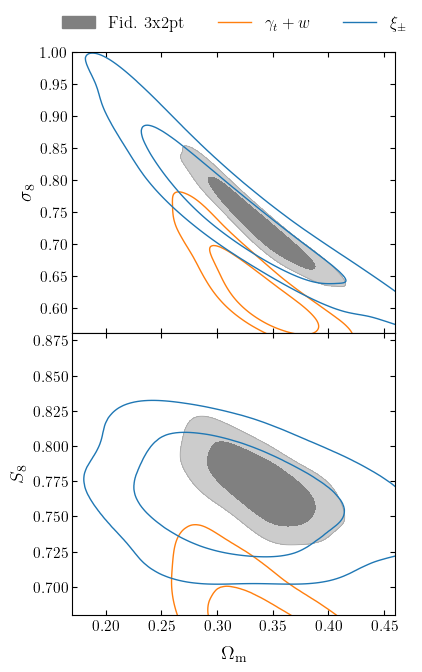

In [5]:
p = plots.get_subplot_plotter(width_inch=4, subplot_size=3, subplot_size_ratio=8/10)
p.settings.scaling = False # prevent scaling down font sizes even though small subplots
p.settings.figure_legend_frame = False
p.rectangle_plot(
	['cosmological_parameters--omega_m'],
	['cosmological_parameters--sigma_8', 'S8'],
	roots=[chains['3x2pt'], chains['2x2pt'], chains['shear']],
	nx=1,
	filled=[True, False, False],
	lims=[0.16, 0.46, 0.680, 0.880],
	colors=['gray', 'tab:orange', 'tab:blue'],
	contour_lws=[2, 2, 2],
	legend_labels=['Fid. 3x2pt', r'$\gamma_t + w$', r'$\xi_{\pm}$'],
	share_x=True,
	gridspec_kw={'width_ratios': [1, 1], 'wspace': 0}
)
p.get_axes(0,0).set_xticks(np.linspace(0.2, 0.45, 6))
p.get_axes(0,0).set_yticks(np.linspace(0.6, 1, 9))
p.get_axes(1,0).set_yticks(np.linspace(0.7, 0.875, 8))
p.get_axes(0,0).set_ylim([0.56, 1])
p.get_axes(0,0).set_xlim([0.17, 0.46])
p.get_axes(1,0).set_ylim([0.68, 0.88])

p.export("./cosmosis-chains/DES-Y3-FIG6-REPRODUCTION-2.pdf")

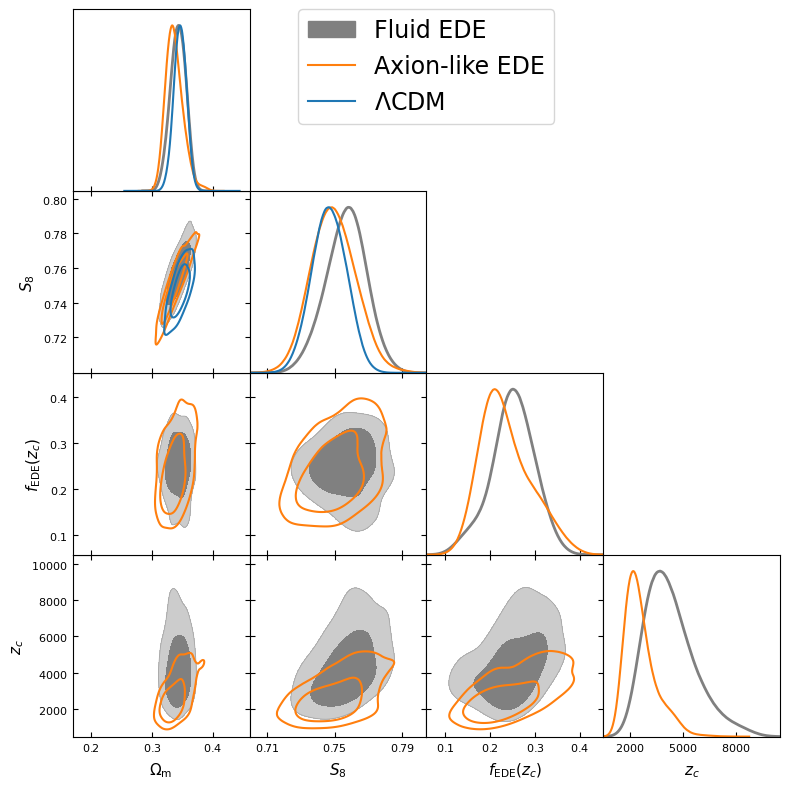

In [8]:
p = plots.get_subplot_plotter(width_inch=8)
p.settings.subplot_size_ratio = 1
p.settings.legend_fontsize = 20

p.triangle_plot(
	[chains['fluid_ede'], chains['quint_ede'], chains['3x2pt']],
	['cosmological_parameters--omega_m', 'S8', 'cosmological_parameters--fde_zc', 'zc'],
	param_limits={'cosmological_parameters--omega_m': [0.17, 0.46], 'cosmological_parameters--sigma_8': [0.56, 1.0]},
	contour_colors=['gray', 'tab:orange', 'tab:blue'],
	filled=[True, False, False],
	contour_lws=[2, 1.5, 1.5],
	legend_labels=['Fluid EDE', 'Axion-like EDE', r'$\Lambda$CDM']	
)
p.export("./cosmosis-chains/EDE-TESTS-2.pdf")

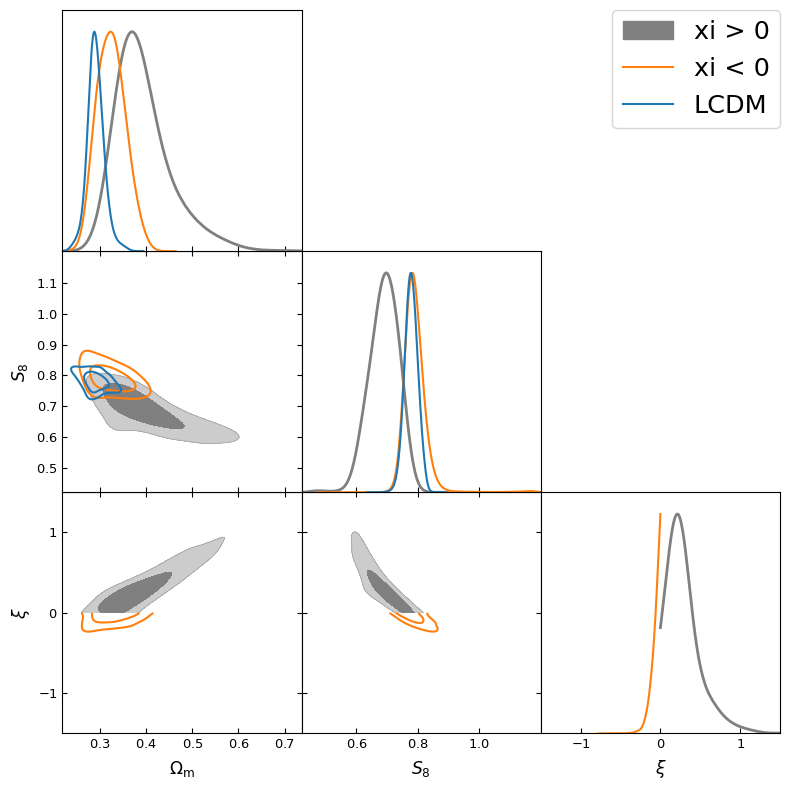

In [12]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
p = plots.get_subplot_plotter(width_inch=8)
p.settings.subplot_size_ratio = 1
p.settings.legend_fontsize = 20

p.triangle_plot(
	[chains['xipos'], chains['xineg'], chains['lcdm']],
	['cosmological_parameters--omega_m', 'S8', 'cosmological_parameters--xi_interaction',],
	param_limits={'cosmological_parameters--xi_interaction': [-1.5, 1.5]},
	contour_colors=['gray', 'tab:orange', 'tab:blue'],
	filled=[True, False, False],
	contour_lws=[2, 1.5, 1.5],
	# legend_labels=[r'$\xi > 0$', r'$\xi < 0$', r'$\xi = 0$']	
)
p.export("./cosmosis-chains/IDEDM-TESTS.pdf")